In [444]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

In [445]:
tr = pd.read_csv('/train.csv')
tst = pd.read_csv('/valid.csv')

In [446]:
print(tr.shape)
print(tst.shape)

(14456, 2666)
(3642, 2666)


In [ ]:
tst.head(5)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348


In [ ]:
tr.head(5)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


<Axes: >

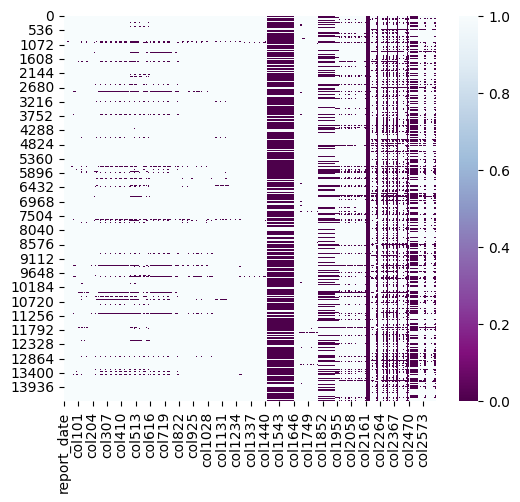

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(tr.isnull(), cmap='BuPu_r')

<Axes: >

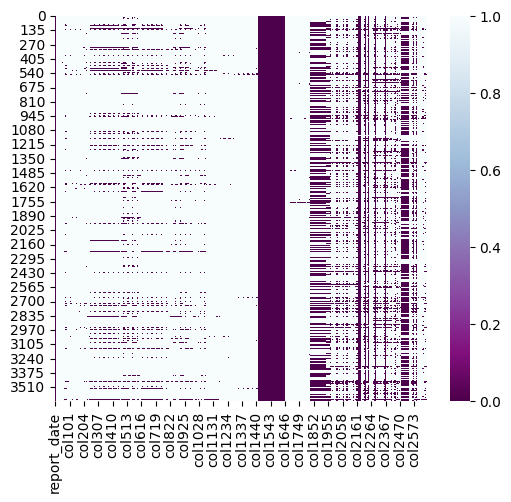

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(tst.isnull(), cmap='BuPu_r')

Удаляем строки и столбцы, в которых больше 70 процентов пропусков

In [447]:
threshold = 0.7
tr_c = tr.loc[:, tr.isnull().mean() < threshold]
threshold = 0.7
tr_c = tr_c[tr_c.isnull().mean(axis=1) < threshold]

In [448]:
threshold = 0.7
tst_c = tst.loc[:, tst.isnull().mean() < threshold]
threshold = 0.7
tst_c = tst_c[tst_c.isnull().mean(axis=1) < threshold]

In [401]:
print(tr_c.shape)
print(tst_c.shape)

(12885, 503)
(3640, 540)


In [449]:
# Подсчет количества непустых значений в каждой строке
tr_c['non_null_count'] = tr_c.apply(lambda row: row.count(), axis=1)

# Сортировка по количеству непустых значений в порядке убывания
tr_s = tr_c.sort_values(by='non_null_count', ascending=False)

# Оставляем только 5000 самых заполненных строк
tr_s = tr_s.head(5000)

# Удаляем временный столбец 'non_null_count'
tr_s = tr_s.drop(columns=['non_null_count'])

In [403]:
print(tr_s.shape)
print(tst_c.shape)

(5000, 503)
(3640, 540)


In [404]:
tr_s.head(5)

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
6885,2023-01-01,5000,0,0,53872fd7-b5f6-ec11-b822-005056b8a6c4,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,6250288.0,6250288.0,6250288.0,6250288.0,6250288.0,6250288.0,0.258634
6793,2023-02-01,5879,0,0,02de0f50-bc5a-ed11-b822-005056b8a6c4,0.0,0.0,0.0,1.0,1.0,...,360.0,360.0,360.0,8145260.0,8145260.0,8145260.0,8145260.0,8145260.0,8145260.0,0.264647
5918,2022-05-01,474,1,0,1b2a9ad5-ede6-46be-b1a2-1186a40e156d,0.0,0.0,0.0,1.0,1.0,...,360.0,360.0,360.0,8126000.0,8126000.0,8126000.0,8126000.0,8126000.0,8126000.0,0.265912
8723,2023-02-01,6636,0,0,c24175f0-b259-ed11-b823-005056b8a72c,0.0,0.0,0.0,1.0,1.0,...,360.0,360.0,360.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.260853
2972,2023-01-01,3491,0,0,210b9249-abf6-ec11-b822-005056b8a6c4,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,0.258007


In [405]:
tst_c.head(5)

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2582,col2583,col2584,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,0,0151dccf-0ecb-ed11-b828-005056b81dee,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,0,074ce8a6-859a-4084-a1c6-41343a94a856,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,0,08e72a9b-74fd-450a-982e-a8cede3facb3,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,0,0a033230-3889-4239-8900-0ffb7e48958c,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,362.0,362.0,362.0,10391000.0,10391000.0,10391000.0,0.257348


<Axes: >

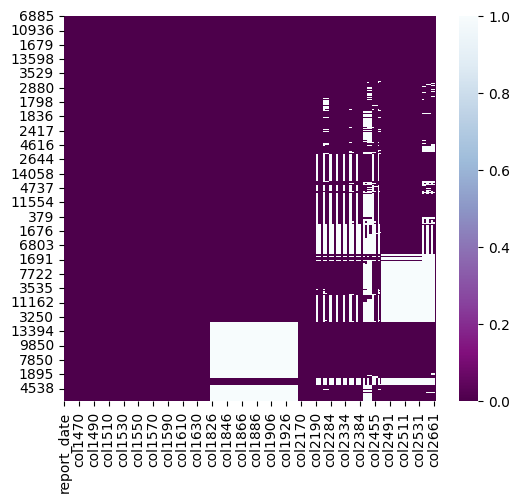

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(tr_s.isnull(), cmap='BuPu_r')

<Axes: >

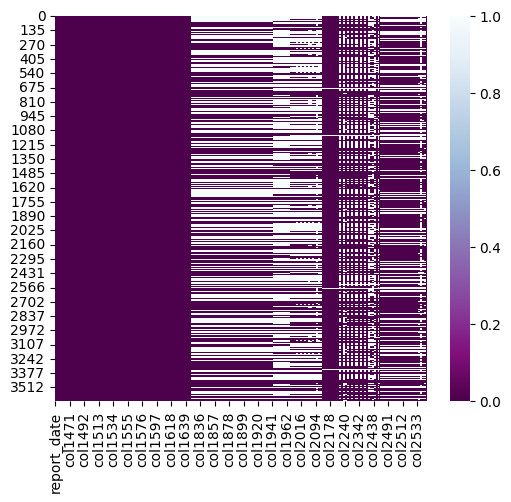

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(tst_c.isnull(), cmap='BuPu_r')

In [450]:
cat_columns = tr_s.select_dtypes('object').columns
numeric_columns = tr_s.select_dtypes(include=['float']).columns
tr_s = tr_s.drop_duplicates(subset=list(set(tr_s.columns) - set(['report_date', 'target'])))

# Заполняем пропущенные значения в категориальных переменных
for cat_col in cat_columns:
    tr_s[cat_col] = tr_s[cat_col].fillna("unknown")

# Заполняем пропущенные значения в числовых переменных
for num_col in numeric_columns:
    mean_value = tr_s[num_col].mean()
    tr_s[num_col] = tr_s[num_col].fillna(int(mean_value))

tr_s = tr_s.apply(lambda x:x.fillna(0))


In [451]:
cat_columns = tst_c.select_dtypes('object').columns
numeric_columns = tst_c.select_dtypes(include=['float']).columns
tst_c = tst_c.drop_duplicates(subset=list(set(tst_c.columns) - set(['report_date', 'target'])))

# Заполняем пропущенные значения в категориальных переменных
for cat_col in cat_columns:
    tst_c[cat_col] = tst_c[cat_col].fillna("unknown")

# Заполняем пропущенные значения в числовых переменных
for num_col in numeric_columns:
    mean_value = tst_c[num_col].mean()
    tst_c[num_col] = tst_c[num_col].fillna(int(mean_value))

tst_s = tst_c.apply(lambda x:x.fillna(0))

In [452]:
# # Порог заполненности (более 80%)
# threshold = 0.8

# # Вывод столбцов, где заполнено более 80% значений
# filled_columns = tr_c.columns[tr_c.count() / len(df) > threshold]
# print("Столбцы, где заполнено более 80% значений:")
# print(filled_columns)
def del_duble(tr_s):
  unique_columns = []
  for column in tr_s.columns:
    if not any(tr_s[column].equals(tr_s[col]) for col in unique_columns):
      unique_columns.append(column)
  return tr_s[unique_columns]

tr_s = del_duble(tr_s)
print(tr_s.shape)

(4995, 271)


In [453]:
def del_duble(tst_s):
  unique_columns = []
  for column in tst_s.columns:
    if not any(tst_s[column].equals(tst_s[col]) for col in unique_columns):
      unique_columns.append(column)
  return tst_s[unique_columns]

tst_s = del_duble(tst_s)
print(tst_s.shape)

(3630, 290)


In [454]:
# Вывод всех нечисловых столбцов
non_numeric_columns = tr_s.select_dtypes(exclude=['number'])
print("Нечисловые столбцы трейн:")
print(non_numeric_columns)
non_numeric_columns = tst_s.select_dtypes(exclude=['number'])
print("Нечисловые столбцы тест:")
print(non_numeric_columns)

Нечисловые столбцы трейн:
      report_date                               col1454
6885   2023-01-01  53872fd7-b5f6-ec11-b822-005056b8a6c4
6793   2023-02-01  02de0f50-bc5a-ed11-b822-005056b8a6c4
5918   2022-05-01  1b2a9ad5-ede6-46be-b1a2-1186a40e156d
8723   2023-02-01  c24175f0-b259-ed11-b823-005056b8a72c
2972   2023-01-01  210b9249-abf6-ec11-b822-005056b8a6c4
...           ...                                   ...
12812  2022-05-01  6c851050-8025-4a3e-9cec-604b380bced3
11429  2022-04-01  7e456615-f4d1-49fe-998e-1140e14188d4
13372  2022-04-01  6200165e-24cf-47b8-adb8-0f88311ceba9
5117   2022-06-01  59e6b55b-2ce7-40d6-b6ca-42a966c02855
3631   2022-03-01  5b494ce5-88b4-40ce-84ef-1a74147dd6f8

[4995 rows x 2 columns]
Нечисловые столбцы тест:
     report_date                               col1454
0     2023-04-01  01016bd5-10dc-ec11-b823-005056b825cd
1     2023-05-01  0151dccf-0ecb-ed11-b828-005056b81dee
2     2023-05-01  074ce8a6-859a-4084-a1c6-41343a94a856
3     2023-03-01  08e72a9b-74fd-

In [455]:
tst_s.drop(['report_date'], axis = 1, inplace = True)
tst_s.drop(['col1454'], axis = 1, inplace = True)
tst_s.drop(['col2663'], axis = 1, inplace = True)
tr_s.drop(['report_date'], axis = 1, inplace = True)
tr_s.drop(['col1454'], axis = 1, inplace = True)
tr_s.drop(['col2663'], axis = 1, inplace = True)

In [379]:
print("Количество пропущенных значений в трейне:")
print(tr_s.isnull().sum())
print("Количество пропущенных значений в тесте:")
print(tst_s.isnull().sum())

Количество пропущенных значений в трейне:
client_id    0
target       0
col1453      0
col1455      0
col1456      0
            ..
col2655      0
col2656      0
col2660      0
col2661      0
col2662      0
Length: 268, dtype: int64
Количество пропущенных значений в тесте:
client_id    0
target       0
col1453      0
col1455      0
col1456      0
            ..
col2589      0
col2590      0
col2660      0
col2661      0
col2662      0
Length: 287, dtype: int64


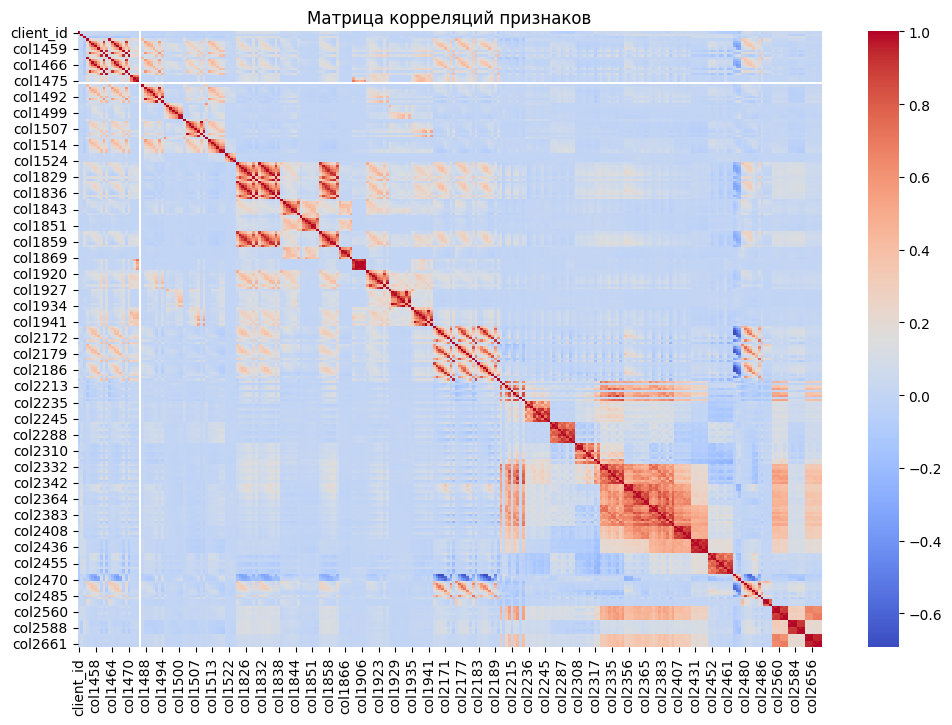

In [ ]:
# Анализ корреляций
correlation_matrix = tr_s.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Матрица корреляций признаков')
plt.show()

In [428]:
print(tr_s['col1474'].value_counts())
print(tr_s['col1475'].value_counts())
print(tr_s['col1479'].value_counts())
print(tst_s['col1470'].value_counts())
print(tst_s['col1471'].value_counts())

col1474
0.0    4993
2.0       2
Name: count, dtype: int64
col1475
0.0    4992
2.0       2
1.0       1
Name: count, dtype: int64
col1479
0.0    4995
Name: count, dtype: int64
col1470
1.0     2312
2.0      851
3.0      273
4.0      107
5.0       44
6.0       14
8.0        6
7.0        5
13.0       4
16.0       4
9.0        4
12.0       2
11.0       1
10.0       1
18.0       1
20.0       1
Name: count, dtype: int64
col1471
0.0    3630
Name: count, dtype: int64


In [456]:
tst_s.drop(['col1470'], axis = 1, inplace = True)
tst_s.drop(['col1471'], axis = 1, inplace = True)
tr_s.drop(['col1474'], axis = 1, inplace = True)
tr_s.drop(['col1475'], axis = 1, inplace = True)
tr_s.drop(['col1479'], axis = 1, inplace = True)

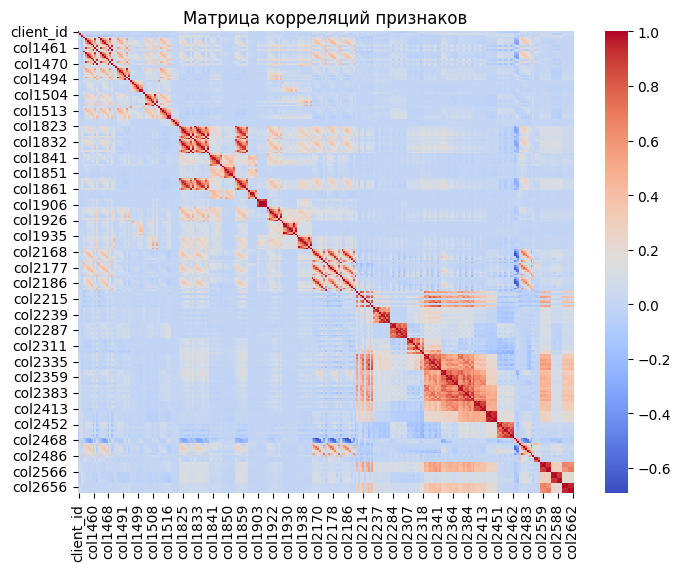

In [ ]:
# Анализ корреляций
correlation_matrix = tr_s.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Матрица корреляций признаков')
plt.show()

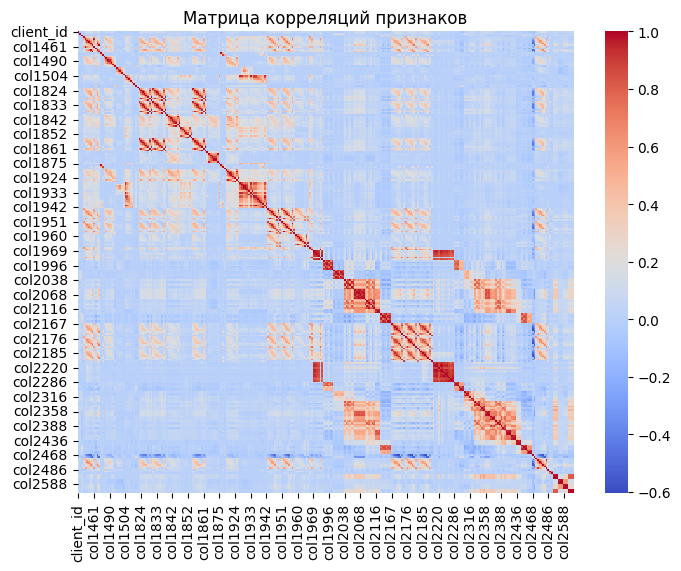

In [ ]:
# Анализ корреляций
correlation_matrix = tst_s.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Матрица корреляций признаков')
plt.show()

In [457]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [458]:
# Удаление столбца client_id
tr_s = tr_s.drop('client_id', axis=1)

tst_s = tst_s.drop('client_id', axis=1)

In [459]:
# Оставляем только те колонки в валидационном датасете, которые есть в обучающем
tst_s = tr_s[tr_s.columns.intersection(tr_s.columns)]
missing_columns = set(tr_s.columns) - set(tst_s.columns)

for col in missing_columns:
    tst_s[col] = 0  # Или другое значение, например, среднее/медиану по обучающему набору

# Приводим порядок колонок к обучающему набору
tst_s = tst_s[tr_s.columns]

In [433]:
print(tr_s.shape)
print(tst_s.shape)

(4995, 264)
(4995, 264)


In [460]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = tr_s.drop('target', axis=1)
y = tr_s['target']

In [461]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [462]:
model = LogisticRegression(class_weight="balanced", random_state=101, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

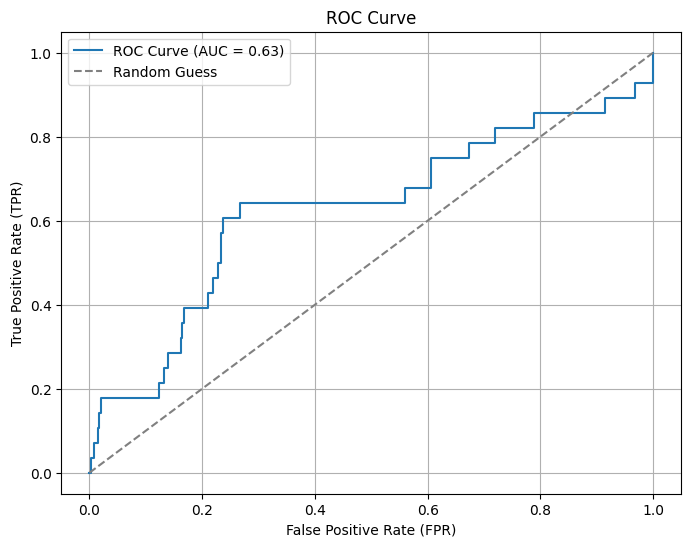

In [463]:
# Предсказание вероятностей для тестовой выборки
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычисление AUC (Area Under Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [464]:
# Прогнозирование на валидационной выборке
X_valid = tst_s.drop('target', axis=1)
y_valid = tst_s['target']

y_valid_pred = model.predict(X_valid)
y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]

In [465]:
# Оценка качества модели на валидационной выборке
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f'Accuracy on validation set: {accuracy_valid}')

print(classification_report(y_valid, y_valid_pred))

roc_auc_valid = roc_auc_score(y_valid, y_valid_pred_proba)
print(f'ROC AUC on validation set: {roc_auc_valid}')

Accuracy on validation set: 0.7325325325325326
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      4830
           1       0.08      0.65      0.14       165

    accuracy                           0.73      4995
   macro avg       0.53      0.69      0.49      4995
weighted avg       0.95      0.73      0.82      4995

ROC AUC on validation set: 0.7340046427002949


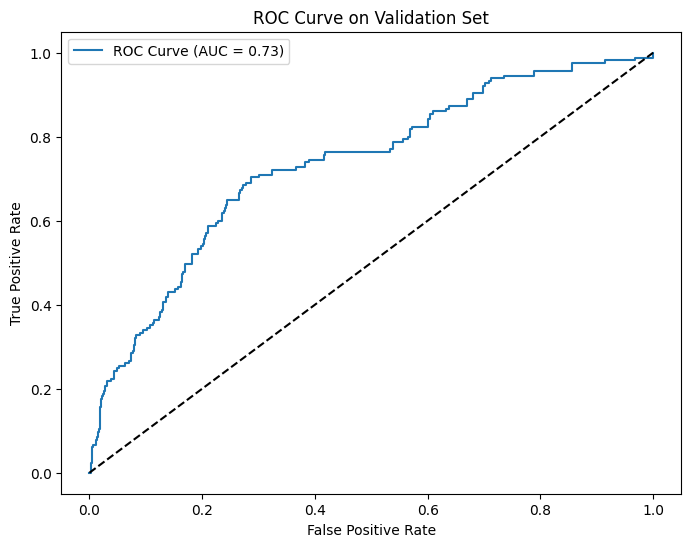

In [466]:
# Визуализация ROC-кривой на валидационной выборке
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_valid:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Set')
plt.legend()
plt.show()

In [467]:
tst_s.to_csv('clearValid.csv', index=False)

In [468]:
tr_s.to_csv('clearTrain.csv', index=False)